In [16]:
import pandas as pd
import missingno as msno
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv('./csv/donnees.csv') # On importe notre DataSet

In [18]:
# On regarde si il y a des doublons et on les isoles
rows_duplicated = df.loc[df.duplicated() == True]
rows_duplicated

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [19]:
# On pourrait se dire que c'est deux personnes différentes avec le même profil mais les charges sont exactement les mêmes
# On décide donc de retirer les doublons du DataFrame
df = df.drop_duplicates()
df.shape # On peut voir qu'on est passé de 1338 à 1337 lignes

(1337, 7)

## Nettoyage des données

Dans notre analyse nous avons remarqué qu'en général les lignes ayant comme charges une valeur supérieur à 50.000 se démarquent des autres

Je décide donc de retirer toutes les lignes ou charges est supérieur à 50.000

In [21]:
df.loc[df['charges'] > 50000].sort_values(by=["charges"])

,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
1146,60,male,32.800,0,yes,southwest,52590.82939
819,33,female,35.530,0,yes,northwest,55135.40209
577,31,female,38.095,1,yes,northeast,58571.07448
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309
543,54,female,47.410,0,yes,southeast,63770.42801


In [22]:
# Suppression des ligne avec charges > 50000
df = df.drop(df.loc[df['charges'] > 50000].index, axis=0)

On peut donc voir que maintenant nos données "extreme" ne tirent plus le graphique

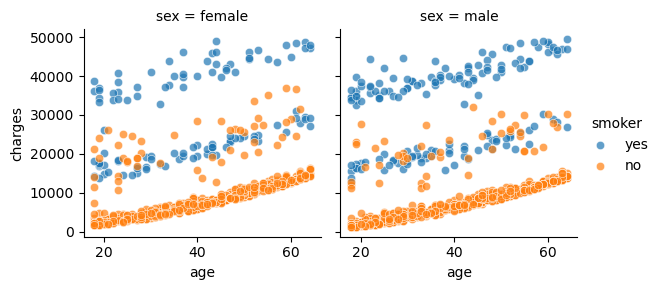

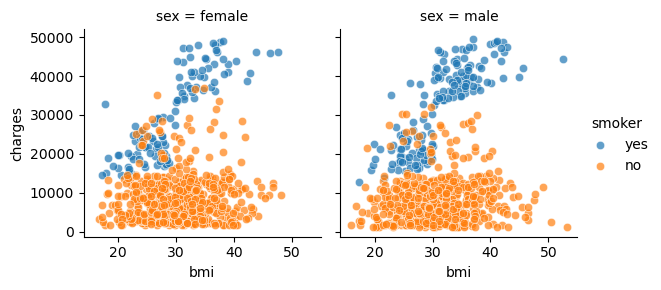

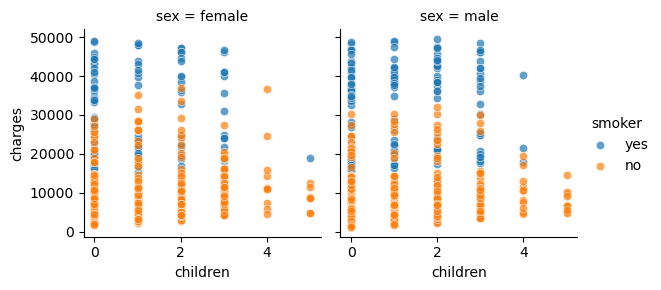

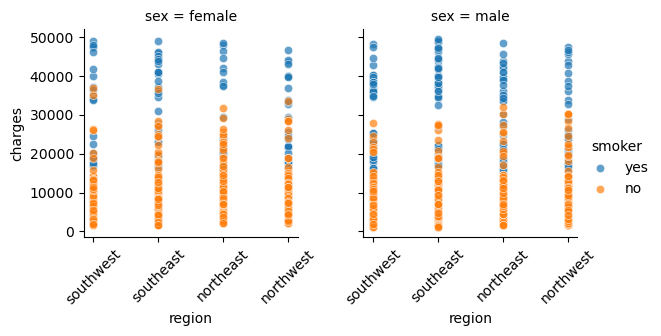

In [23]:
# Je décide de reafficher les graphiques pour regarder les changements
for col in ['age', 'bmi', 'children', 'region']:
    g = sns.FacetGrid(df, col="sex", hue="smoker")
    g.map(sns.scatterplot, col, "charges", alpha=.7)
    if col == "region":
        g.set_xticklabels(rotation=45)
    g.add_legend()

## Notre futur model

Dans l'objectif d'améliorer mon model je décide de faire une catégorie d'IMC en fonction de l'age et du BMI

In [25]:
def categorie_imc(imc: float) -> str:
    if imc < 18.5:
        return "Maigreur"
    elif imc < 25:
        return "Corpulence normale"
    elif imc < 30:
        return "Surpoids"
    elif imc < 35:
        return "Obésité modérée"
    elif imc < 40:
        return "Obésité sévère"
    else:
        return "Obésité morbide"

In [27]:
df['cat_imc'] = df.apply(lambda x: categorie_imc(x['age'], x['bmi']), axis=1)

In [30]:
# export data

df.to_csv('data.csv', index=False)